# 2 - Team Composition and Homogeneity

## attribute analysis and visualization

In [1]:
import pandas as pd
import re 
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import ttest_ind
pd.options.display.max_columns = 50

In [2]:
gem = pd.read_csv('task-and-exam-marks-in-groups.csv', delimiter=";", encoding="utf-8")
del gem["Unnamed: 0"]

In [3]:
gem.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,hash2,a1,a2,a3,a4,a5,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree
0,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,0afdc45f7ee8e52ebf1afb2970e37b36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,1.0,tec,ba
1,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,0.0,d821cd2c7b995d4e3a75c64d25e53529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,inf,1.0,tec,ba
2,tutor1,1146.0,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,14.5,4.0,0.0,fa873577b8543ed8a6d7d8d7fe6ca546,7.0,7.0,8.5,8.0,6.0,7.0,8.5,52.0,3.3,2.0,1.0,inf,1.0,tec,ba
3,tutor3,19.0,13.00,6.5,7.5,9.0,3.5,4.5,5.5,0.0,0.0,0.0,0.0,e7c181a90d7161b4f885a69f6d426474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,inf,1.0,tec,ba
4,tutor5,5012.0,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,8.5,14.0,0.0,e2be9ece8b482afb4717e4e13907a525,4.0,7.0,7.0,8.5,6.5,1.5,4.0,38.5,5.0,4.0,0.0,inf,3.0,tec,ba


In [4]:
gem["punkte"].mean()

32.66129032258065

In our dataset we have 125 teams, mostly with 2 members. There are exactly 2 teams with 3 members and several alone working students (17, to be precise). In the following section we will describe the relationship within the teams with their difference to the team mean, because on the one hand, for 2-member teams there is no substantial difference in the difference to the mean or the absolute difference (only the value is divided in half), on the other hand it makes it easier to handle the 3-member teams, as they get one resulting difference and not 2 differences to each of the other team members.

# attribute generation

+ average homework grade
+ team average
+ difference between team members
    + to mean
    + absolute
    
   
## average grade in homeworks

only if grade does not equals zero

In [5]:
gem = gem.replace("0", np.nan)
gem["team_id"] = gem["team_id"].replace(np.nan, "0")
gem["student_id"] = gem["student_id"].replace(np.nan, "0")

In [6]:
gem["avg_hw"] = gem[["b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9", "b10", "b11"]].mean(axis=1)

In [7]:
gem["avg_hw"].describe()

count    230.000000
mean      11.330308
std        1.905145
min        6.562500
25%       10.100000
50%       11.550000
75%       12.800000
max       14.900000
Name: avg_hw, dtype: float64

## team average

creates an average value of points in the final exam for each team

In [8]:
gem["team_avg"] = 0
for i in gem["team_id"]:
    gem["team_avg"][gem["team_id"] == i] = gem["punkte"][gem["team_id"] == i].mean()

C:\Users\laris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
gem["team_avg"].describe()

count    194.000000
mean      51.788660
std       13.424580
min        9.000000
25%       42.750000
50%       54.125000
75%       62.166667
max       80.500000
Name: team_avg, dtype: float64

## difference between team members

is calculated between each student and it's team average value.

In [10]:
gem["student_id"] = gem["student_id"].astype(int)

In [11]:
gem = gem[~pd.isnull(gem["tutor"])]

In [12]:
gem["diff_to_team"] = gem["punkte"] - gem["team_avg"]

In [13]:
gem["member_no"] = 0
for i in gem["team_id"].unique():
    v = 0
    for j in gem["student_id"][gem["team_id"] == i]:
        gem["member_no"][gem["student_id"] == j] = v
        v = v + 1

C:\Users\laris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
gem.tail()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,hash2,a1,a2,a3,a4,a5,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree,avg_hw,team_avg,diff_to_team,member_no
230,tutor2,23,13.0,8.0,9.0,13.0,4.5,2.0,2.5,8.5,5.5,13.0,4.5,d54a5c324c7e3b08441d4e91e5f1ddc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230,NaN,wip,5.0,eco,ba,7.590909,NaN,NaN,1
231,tutor4,44,15.0,15.0,9.0,9.0,NaN,6.5,8.5,12.0,5.5,12.5,NaN,c23fe2a55d01694711e6b683243b415a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231,NaN,mat,7.0,tec,ba,10.333333,NaN,NaN,1
232,tutor3,75,15.0,13.0,14.0,14.0,12.5,14.5,13.5,14.0,13.5,10.0,NaN,2411cc6ea15b4d75f5f217d140a8c598,4.5,10.0,9.0,8.0,11.0,6.0,8.5,57.0,2.7,232,1.0,mat,5.0,tec,ba,13.400000,57.00,0.00,1
233,tutor5,5002,14.0,9.0,14.5,15.0,12.5,12.5,15.0,6.5,9.5,5.0,NaN,b0578b0298581be610d5eea04436a9d4,3.0,6.5,4.0,12.0,7.0,2.0,4.0,38.5,5.0,233,NaN,mat,5.0,tec,ba,11.350000,53.00,-14.50,1
234,tutor5,5013,15.0,13.0,15.0,14.0,13.0,15.0,14.5,14.0,14.5,15.0,NaN,77b22a70f68d52c23703f071b4de5d4f,6.0,11.0,9.0,12.0,9.0,8.0,12.0,67.0,1.7,234,1.0,inf,1.0,tec,ba,14.300000,57.25,9.75,1


In [15]:
gem.to_csv('task-and-exam-marks-in-groups_with_mean2.csv', sep=";", encoding="utf-8")

In [16]:
gem = pd.read_csv('task-and-exam-marks-in-groups_with_mean2.csv', sep=";", encoding="utf-8")
del gem["Unnamed: 0"]
gem.head()

,tutor,team_id,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,hash2,a1,a2,a3,a4,a5,a6,a7,punkte,note,student_id,pass,subject,semester,faculty,degree,avg_hw,team_avg,diff_to_team,member_no
0,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,NaN,0afdc45f7ee8e52ebf1afb2970e37b36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,inf,1.0,tec,ba,10.050000,NaN,NaN,0
1,tutor2,1.0,10.00,6.5,11.5,13.0,8.5,8.0,10.5,12.5,7.0,13.0,NaN,d821cd2c7b995d4e3a75c64d25e53529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,inf,1.0,tec,ba,10.050000,NaN,NaN,1
2,tutor1,1146.0,13.75,13.5,14.5,13.5,11.0,11.5,13.5,15.0,14.5,4.0,NaN,fa873577b8543ed8a6d7d8d7fe6ca546,7.0,7.0,8.5,8.0,6.0,7.0,8.5,52.0,3.3,2,1.0,inf,1.0,tec,ba,12.475000,52.00,0.00,0
3,tutor3,19.0,13.00,6.5,7.5,9.0,3.5,4.5,5.5,NaN,NaN,NaN,NaN,e7c181a90d7161b4f885a69f6d426474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,inf,1.0,tec,ba,7.071429,NaN,NaN,0
4,tutor5,5012.0,14.00,11.5,12.5,14.5,8.0,7.0,13.5,6.5,8.5,14.0,NaN,e2be9ece8b482afb4717e4e13907a525,4.0,7.0,7.0,8.5,6.5,1.5,4.0,38.5,5.0,4,NaN,inf,3.0,tec,ba,11.000000,32.25,6.25,0


# visualisation

(array([  2.,   0.,   1.,   2.,   1.,   0.,   2.,   1.,   2.,   1.,   5.,
          8.,   5.,   5.,   7.,  11.,   7.,   7.,   8.,  10.,   8.,   5.,
          5.,   8.,   7.,   5.,   7.,   2.,   2.,   1.]),
 array([  9.        ,  11.38333333,  13.76666667,  16.15      ,
         18.53333333,  20.91666667,  23.3       ,  25.68333333,
         28.06666667,  30.45      ,  32.83333333,  35.21666667,
         37.6       ,  39.98333333,  42.36666667,  44.75      ,
         47.13333333,  49.51666667,  51.9       ,  54.28333333,
         56.66666667,  59.05      ,  61.43333333,  63.81666667,
         66.2       ,  68.58333333,  70.96666667,  73.35      ,
         75.73333333,  78.11666667,  80.5       ]),
 <a list of 30 Patch objects>)

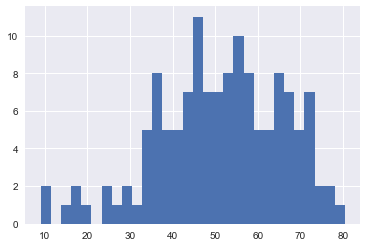

In [17]:
plt.hist(gem["punkte"].dropna(), bins=30)

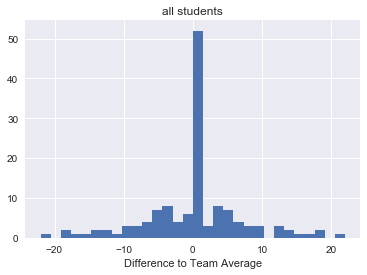

In [18]:
plt.hist(gem["diff_to_team"].dropna(), bins=30)
plt.title("all students")
plt.xlabel("Difference to Team Average")

Histogram of the differences from each student to the team average. The high number in the middle indicates all teams, that scored 0 in the individual points as well as in the team average.

In [19]:
gem["plott_diff"] = gem["diff_to_team"]
gem["plott_diff"] = gem["plott_diff"].abs()
gem["plott_diff"] = gem["plott_diff"].replace("0", np.nan)

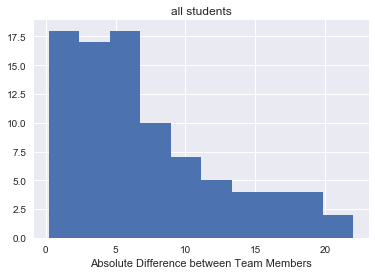

In [20]:
plt.hist(gem["plott_diff"].dropna(), bins=10)
plt.title("all students")
plt.xlabel("Absolute Difference between Team Members")

Same as above, only without the 0s and with only positive differences from single students to their team average.

In [21]:
gem["team_avg"][gem["punkte"] < 42.5].describe()

count    35.000000
mean     36.042857
std       9.055484
min       9.000000
25%      33.250000
50%      36.000000
75%      41.750000
max      53.000000
Name: team_avg, dtype: float64

In [22]:
gem["team_avg"][gem["punkte"] >= 42.5].describe()

count    100.000000
mean      56.395000
std        9.597597
min       31.250000
25%       49.937500
50%       57.125000
75%       62.687500
max       80.500000
Name: team_avg, dtype: float64

The team average of those students who passed the final exam seems to be higher (`mean = 59.19`) than the team average of those students who failed (`mean = 41.17`). Is there a systematic difference in teams between passing and failing students? Are they members of systematic different teams? Have a look at the t-test below.

In [23]:
stats.t.ppf(1-0.05, len(gem)-len(gem.columns))

1.6524698419693926

In [24]:
ttest_ind(gem["team_avg"][gem["punkte"] < 50], gem["team_avg"][gem["punkte"] >= 50])

Ttest_indResult(statistic=-10.902241097247618, pvalue=3.6133459807014933e-20)

As 1. the calculated critical t-value is higher than the statistical calculated value, and 2. the pvalue is smaller than the critical value of 0.05, we can reject the nullhypothesis, that the two groups are statistically the same, in other words: students who failed the exam are statistically (in their team averages of exam grades) different from students who passed the exam. This means that the teams were not constructed evenly among failing and passing students, on the contrary, the two groups tended to build groups seperately. Or, we can never exclude this possibility, a weaker student working together with a better student was "forced" to pass the exam, while other weaker students, trying to solve the problems on their own, were foredoomed and failed all together. 

Additional to the t-test you can see the difference for the passing and failing teams in this histogram. We see clearly two different curves. (I am not sure if this plotting is correct. My gut feeling says that it's not as easy as I want to have it here). 

# Are groupmembers very alike each other or do they differ?

## #1

In [25]:
member1 = gem[gem["member_no"] == 1]
member1["student_id"].count()

108

In [26]:
member2 = gem[gem["member_no"] == 0]
member2["student_id"].count()

125

In [27]:
new = pd.merge(member1, member2, on='team_id', how='outer')

In [28]:
new[["punkte_x", "punkte_y"]].corr()

,punkte_x,punkte_y
punkte_x,1.000000,0.285659
punkte_y,0.285659,1.000000


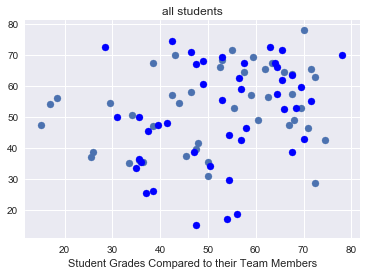

In [29]:
plt.title("all students")
plt.xlabel("Student Grades Compared to their Team Members")
plt.scatter(new["punkte_x"], new["punkte_y"])
plt.scatter(new["punkte_y"], new["punkte_x"], c="blue")
plt.show()

In [30]:
stats.t.ppf(1-0.05, len(new)-len(new.columns))

1.6715527621536721

In [31]:
ttest_ind(new.dropna()["punkte_x"], new.dropna()["punkte_y"])

Ttest_indResult(statistic=-0.96517637794730504, pvalue=0.3891131010994201)

## #2

In [32]:
new["difference"] = new["punkte_x"] - new["punkte_y"]

In [33]:
stats.t.ppf(1-0.05, len(new)-len(new.columns))

1.6720288881322787

In [34]:
stats.ttest_1samp(new.dropna()["difference"], 0)

Ttest_1sampResult(statistic=-0.68974894287267385, pvalue=0.56163352459968308)